Set-up environment via terminal:
- Navigate to `home/bedmap` (local repository location on Roger)
    - geopandas
- `conda create -p /home/kim/bedmap/.conda-preprocess python=3.9` (This puts changes in Git though which stuffs git up)
    - cartopy requires 3.9
- `conda list -e`/ `conda info -e`to show available environments
- `conda activate /home/kim/bedmap/.conda-bedmap` (Python 3.8.18)

Then just use the following commands as normal:
- `conda install x` to install new packages
    - e.g. `conda install python=3 geopandas` needs to be python 3, and conda-forge needs to be added 
- `conda list` to see all installed packages

Issues with environments:
- Have one each

## Install packages

In [1]:
import pandas as pd
# Geopandas is a geo dataframe
# import geopandas as gpd
import numpy as np

# For projection
import pyproj
import cartopy.crs as ccrs  # Projections list

# import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(-3333250, 3333750, 500)
print("Minimum x value", np.min(x))
print("Maximum x value", np.max(x))

Minimum x value -3333250
Maximum x value 3333250


# Check metadata

In [3]:
# This example is BM2
# path_to_bas_agap = "/home/kim/data/bedmap/BAS_2007_AGAP_AIR_BM2.csv"

# LDEO Rosetta of the full Ross ice sheet
path_to_rosetta = "/home/kim/data/bedmap/bedmap3-csv/LDEO_2015_ROSETTA_AIR_BM3.csv"

In [4]:
# seperate is not a comma but a colon with a space
bas_rosetta_meta = pd.read_csv(path_to_rosetta, nrows = 18, sep = ": ", engine = "python", header = None)
bas_rosetta_meta

,0,1
0,#project,Ross Ice Shelf (ROSETTA).
1,#time_coverage_start,2015
2,#time_coverage_end,2017
3,#creator_name,R. Bell (Lamont-Doherty Earth Observatory).
4,#institution,Lamont-Doherty Earth Observatory.
5,#acknowledgement,NSF grant 0958658; 1443543; 1443677; 1443497; ...
6,#source,http://www.ldeo.columbia.edu/polar-geophysics-...
7,#references,https://doi.org/10.1029/2019JF005241
8,#platform,airborne radar.
9,#instrument,DICE IcePod.


# Load data

- skip meta data
- Rosetta has 2.65 M datapoints

In [5]:
# Load data  into a pandas dataframe
# skip 18 rows of metadata
pd_data = pd.read_csv(path_to_rosetta, skiprows = 18, low_memory = False)
pd_data.tail()

,trajectory_id,trace_number,longitude (degree_east),latitude (degree_north),date,time_UTC,surface_altitude (m),land_ice_thickness (m),bedrock_altitude (m),two_way_travel_time (m),aircraft_altitude (m),along_track_distance (m)
2651548,T1110,-9999,173.014007,-77.429764,2017-11-29,20:47:34.86,-440.545754,44.582638,-9999,-9999,725.481529,-9999
2651549,T1110,-9999,173.014100,-77.429601,2017-11-29,20:47:35.03,-287.678752,81.096675,-9999,-9999,725.476059,-9999
2651550,T1110,-9999,173.014193,-77.429437,2017-11-29,20:47:35.19,-177.775326,118.181577,-9999,-9999,725.471172,-9999
2651551,T1110,-9999,173.014286,-77.429273,2017-11-29,20:47:35.35,-20.910828,125.722537,-9999,-9999,725.466533,-9999
2651552,T1110,-9999,173.014380,-77.429109,2017-11-29,20:47:35.52,-339.649337,101.756597,-9999,-9999,725.462131,-9999


In [6]:
df = pd_data[["longitude (degree_east)", "latitude (degree_north)", "date", "surface_altitude (m)", "land_ice_thickness (m)", "bedrock_altitude (m)"]]
# rename columns
df.columns = ["lon", "lat", "date", "s", "t", "b"]

In [7]:
df.loc[(df['s'] != -9999) & (df['t'] != -9999) & (df['b'] == -9999), 'b'] = df['s'] - df['t']

/tmp/ipykernel_1360789/2246285160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['s'] != -9999) & (df['t'] != -9999) & (df['b'] == -9999), 'b'] = df['s'] - df['t']


In [8]:
# df.loc[df['A'] > 2, 'B'] = new_val
df

,lon,lat,date,s,t,b
0,-158.337840,-83.764221,2015-12-01,60.296038,645.212935,-584.916897
1,-158.339047,-83.764289,2015-12-01,60.332607,645.350918,-585.018311
2,-158.340257,-83.764356,2015-12-01,60.364670,645.488200,-585.123530
3,-158.341467,-83.764423,2015-12-01,60.390097,645.572737,-585.182639
4,-158.342679,-83.764490,2015-12-01,60.412078,645.588611,-585.176533
...,...,...,...,...,...,...
2651548,173.014007,-77.429764,2017-11-29,-440.545754,44.582638,-485.128392
2651549,173.014100,-77.429601,2017-11-29,-287.678752,81.096675,-368.775427
2651550,173.014193,-77.429437,2017-11-29,-177.775326,118.181577,-295.956903
2651551,173.014286,-77.429273,2017-11-29,-20.910828,125.722537,-146.633365


In [25]:
def preprocess(data):
    """Input a pd dataframe directly from Bedmap"""
    # subset columns
    df = data[["longitude (degree_east)", "latitude (degree_north)", "date", "surface_altitude (m)", "land_ice_thickness (m)", "bedrock_altitude (m)"]]
    # rename columns
    df.columns = ["lon", "lat", "date", "s", "t", "b"]

    # If s & t are given, fill b
    df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]
    # Drop rows with missing bed elevation value
    df = df.drop(np.where(df.b == -9999)[0])

    # Project
    lonlat_to_polarstereo = pyproj.Transformer.from_crs(crs_from = pyproj.CRS("epsg:4326"), crs_to = pyproj.CRS("epsg:3031"), always_xy = True) # lon, lat
    
    df["x"], df["y"] = lonlat_to_polarstereo.transform(df["lon"], df["lat"])

    return df

def gridding_error(df, zero_offset, res):
    # x grid values for 500m grid
    # 250 offset of 0 is first deducted
    df["x_500"] = (np.round((df.x - zero_offset) / res) * res) + zero_offset  
    df["y_500"] = (np.round((df.y - zero_offset) / res) * res) + zero_offset  

    # Make categocial column based on grid cell index
    df["id_500"] = df["x_500"].astype(int).astype(str) + "_" + df["y_500"].astype(int).astype(str)

    grid_b_series = df.groupby(by = "id_500")["b"].mean()
    grid_b_df = pd.DataFrame(grid_b_series)
    grid_b_df = grid_b_df.rename(columns = {"b": "grid_mean_b"})
    # count
    grid_count = df.groupby(by = "id_500")["b"].count()
    # add to df
    grid_b_df["count"] = np.array(grid_count)

    df_merged = df.merge(grid_b_df, on = "id_500")
    df_merged["error"] = df_merged["grid_mean_b"] - df_merged["b"]

    # Calculate rate of grid cells without measurements (in square)
    x_gridvalues = np.arange(np.min(df_merged.x_500), np.max(df_merged.x_500) + 1, res)
    y_gridvalues = np.arange(np.min(df_merged.y_500), np.max(df_merged.y_500) + 1, res)
    rate = grid_b_df.shape[0]/(x_gridvalues.shape[0] * y_gridvalues.shape[0])
      
    return  df_merged, rate

In [18]:
df_pp = preprocess(pd_data)

/tmp/ipykernel_1360789/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


In [28]:
min_count = 3

res_list = [31.25, 62.5, 125, 250, 500, 1000, 2000]
# Initialise
rmse_list = []
mae_list = []
rate_list = []

for i in res_list:
    zo = i/2
    res = i
    gridded_df, rate = gridding_error(df_pp, zero_offset = zo, res = res)
    rmse = np.sqrt(np.mean(np.square(gridded_df[gridded_df["count"] > min_count]["error"])))
    print(rmse)
    mae = np.mean(np.abs(gridded_df[gridded_df["count"] > min_count]["error"]))
    # Append
    rmse_list.append(rmse)
    mae_list.append(mae)
    rate_list.append(rate)

20.02132239896138
5.1263887104081975
6.090664477007624
6.648068308950073
7.280165921467662
8.266163502595314
9.769279051707514


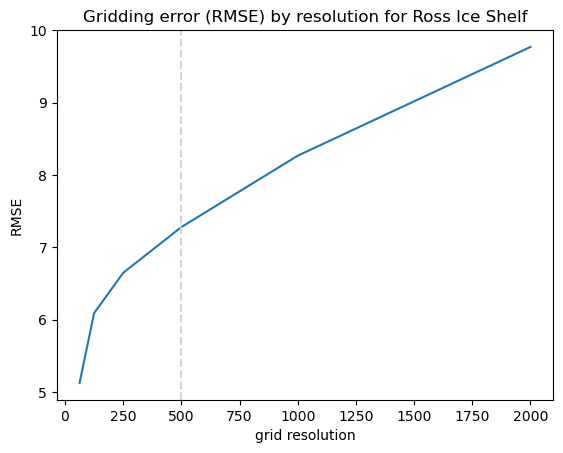

In [27]:
plt.plot(res_list, rmse_list)

plt.xlabel("grid resolution")
plt.ylabel("RMSE")
plt.title("Gridding error (RMSE) by resolution for Ross Ice Shelf")
plt.axvline(x = 500, ls='--', color = "lightgrey")

# Results for 500 m

In [17]:
zo_500 = 250.0
resso_500 = 500.0

df_pp_500 = preprocess(pd_data)
df_500, rate_500 = gridding_error(df_pp_500, zero_offset = zo_500, res = resso_500)

rmse_500m = np.sqrt(np.mean(np.square(df_500[df_500["count"] > min_count]["error"])))
mae_500m = np.mean(np.abs(df_500[df_500["count"] > min_count]["error"]))

print("Rate of cells with measurements:", np.round(rate_500, 3))
print("rmse at 500 m", np.round(rmse_500m, 2))
print("MAE at 500 m", np.round(rmse_500m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1360789/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


85087
Rate of cells with measurements: 0.024
rmse at 500 m 7.28
MAE at 500 m 7.28


# Repeat for 250m

In [13]:
zo_250 = 125.0
resso_250 = 250.0

df_pp_250 = preprocess(pd_data)
df_250, rate_250 = gridding_error(df_pp_250, zero_offset = zo_250, res = resso_250)

rmse_250m = np.sqrt(np.mean(np.square(df_250["error"])))
mae_250m = np.mean(np.abs(df_250["error"]))

print("Rate of cells with measurements:", np.round(rate_250, 3))
print("rmse at 250 m", np.round(rmse_250m, 2))
print("MAE at 250 m", np.round(mae_250m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1150192/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


167910
Rate of cells with measurements: 0.012
rmse at 250 m 6.65
MAE at 250 m 1.26


# 125

In [14]:
zo_125 = 62.5
resso_125 = 125.0

df_pp_125 = preprocess(pd_data)
df_125, rate_125 = gridding_error(df_pp_125, zero_offset = zo_125, res = resso_125)

rmse_125m = np.sqrt(np.mean(np.square(df_125["error"])))
mae_125m = np.mean(np.abs(df_125["error"]))

print("Rate of cells with measurements:", np.round(rate_125, 3))
print("rmse at 125 m", np.round(rmse_125m, 2))
print("MAE at 125 m", np.round(mae_125m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1150192/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


332228
Rate of cells with measurements: 0.006
rmse at 125 m 6.11
MAE at 125 m 0.86


# 62.5

In [15]:
zo_62 = 31.25
resso_62 = 62.5

df_pp_62 = preprocess(pd_data)
df_62, rate_62 = gridding_error(df_pp_62, zero_offset = zo_62, res = resso_62)

rmse_62m = np.sqrt(np.mean(np.square(df_62["error"])))
mae_62m = np.mean(np.abs(df_62["error"]))

print("Rate of cells with measurements:", np.round(rate_62, 3))
print("rmse at 62.5 m", np.round(rmse_62m, 2))
print("MAE at 62.5 m", np.round(mae_62m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1150192/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


659932
Rate of cells with measurements: 0.003
rmse at 62.5 m 5.35
MAE at 62.5 m 0.6


# 31.25

~2 values per field

In [16]:
zo_31 = 15.625
resso_31 = 31.25

df_pp_31 = preprocess(pd_data)
df_31, rate_31 = gridding_error(df_pp_31, zero_offset = zo_31, res = resso_31)

rmse_31m = np.sqrt(np.mean(np.square(df_31["error"])))
mae_31m = np.mean(np.abs(df_31["error"]))

print("Rate of cells with measurements:", np.round(rate_31, 3))
print("rmse at 31.25 m", np.round(rmse_31m, 2))
print("MAE at 31.25 m", np.round(mae_31m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1150192/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


1314319
Rate of cells with measurements: 0.001
rmse at 31.25 m 4.04
MAE at 31.25 m 0.37


# Sub spacing scale:

Max 1 value per grid

In [17]:
zo_15 = 7.8125
resso_15 = 15.625

df_pp_15 = preprocess(pd_data)
df_15, rate_15 = gridding_error(df_pp_15, zero_offset = zo_15, res = resso_15)

rmse_15m = np.sqrt(np.mean(np.square(df_15["error"])))
mae_15m = np.mean(np.abs(df_15["error"]))

print("Rate of cells with measurements:", np.round(rate_15, 3))
print("rmse at 15.625 m", np.round(rmse_15m, 2))
print("MAE at 15.625 m", np.round(mae_15m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1150192/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


2558592
Rate of cells with measurements: 0.001
rmse at 15.625 m 0.8
MAE at 15.625 m 0.02


# 1000

In [23]:
zo_1000 = 500.0
resso_1000 = 1000.0

df_pp_1000 = preprocess(pd_data)
df_1000, rate_1000 = gridding_error(df_pp_1000, zero_offset = zo_1000, res = resso_1000)

rmse_1000m = np.sqrt(np.mean(np.square(df_1000["error"])))
mae_1000m = np.mean(np.abs(df_1000["error"]))

print("Rate of cells with measurements:", np.round(rate_1000, 3))
print("rmse at 1000 m", np.round(rmse_1000m, 2))
print("MAE at 1000 m", np.round(mae_1000m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1150192/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


43239
Rate of cells with measurements: 0.05
rmse at 1000 m 8.27
MAE at 1000 m 2.67


# 2000

In [24]:
zo_2000 = 1000.0
resso_2000 = 2000.0

df_pp_2000 = preprocess(pd_data)
df_2000, rate_2000 = gridding_error(df_pp_2000, zero_offset = zo_2000, res = resso_2000)

rmse_2000m = np.sqrt(np.mean(np.square(df_2000["error"])))
mae_2000m = np.mean(np.abs(df_2000["error"]))

print("Rate of cells with measurements:", np.round(rate_2000, 3))
print("rmse at 1000 m", np.round(rmse_2000m, 2))
print("MAE at 1000 m", np.round(mae_2000m, 2))
# Indicating some expreme errors

/tmp/ipykernel_1150192/2809085644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["b"] = np.where([df["b"] == -9999] and [df["s"] != -9999] and [df["t"] != -9999], (df["s"] - df["t"]), [df["b"]])[0]


21937
Rate of cells with measurements: 0.101
rmse at 1000 m 9.77
MAE at 1000 m 3.73


# Graph

In [25]:
rmse_array = np.array([rmse_15m, rmse_31m, rmse_62m, rmse_125m, rmse_250m, rmse_500m, rmse_1000m, rmse_2000m])
mae_array = np.array([mae_15m, mae_31m, mae_62m, mae_125m, mae_250m, mae_500m, mae_1000m, mae_2000m])
rate_array = np.array([rate_15, rate_31, rate_62, rate_125, rate_250, rate_500, rate_1000, rate_2000])
res_array = np.array([15.625, 31.25, 62.5, 125, 250, 500, 1000, 2000])

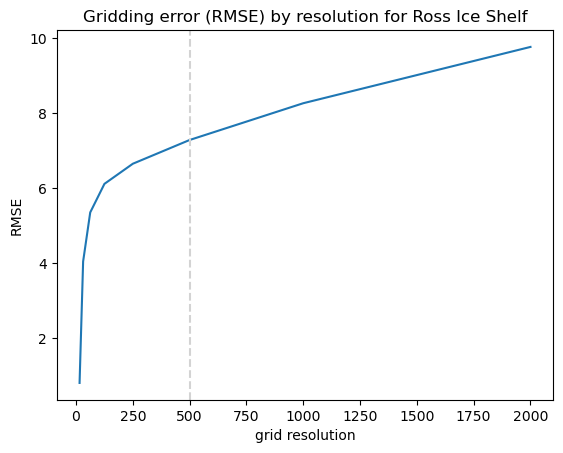

In [35]:
plt.plot(res_array, rmse_array)

plt.xlabel("grid resolution")
plt.ylabel("RMSE")
plt.title("Gridding error (RMSE) by resolution for Ross Ice Shelf")
plt.axvline(x = 500, ls='--', color = "lightgrey")

In [1]:
# Visualise without 15
plt.plot(res_array[1:], rmse_array[1:])

NameError: name 'plt' is not defined

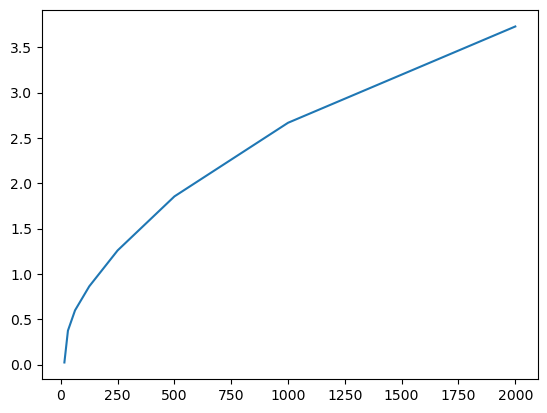

In [75]:
plt.plot(res_array, mae_array)

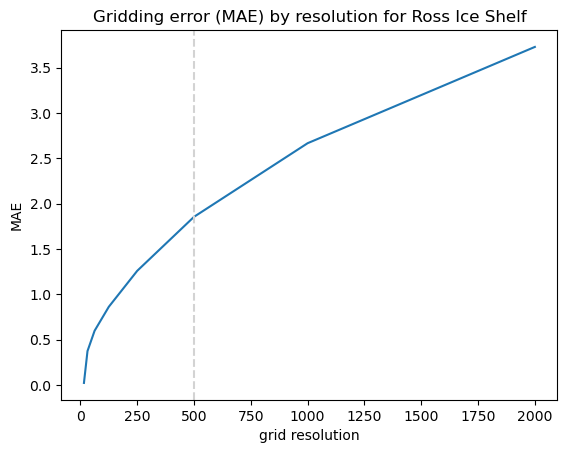

In [34]:
plt.plot(res_array, mae_array)

plt.xlabel("grid resolution")
plt.ylabel("MAE")
plt.title("Gridding error (MAE) by resolution for Ross Ice Shelf")
plt.axvline(x = 500, ls='--', color = "lightgrey")

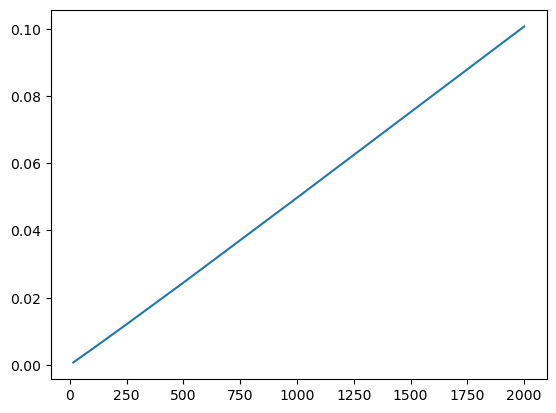

In [77]:
plt.plot(res_array, rate_array)

# Checks

In [ ]:
# Check that distance of any point to grid cell midpoint is never > 250.
print(np.min((df["y"]- df["y_500"])))
print(np.max((df["y"]- df["y_500"])))
print(np.min((df["x"]- df["x_500"])))
print(np.max((df["x"]- df["x_500"])))

In [ ]:
x = np.arange(-3333250, 3333750, 500)
x[6166]

In [ ]:
(np.round((df.x - 250.0) / 500.0) * 500.0) + 250.0

Only interested in bed topo:
- Impute if surface & thickness are given
- remote remaining rows without bed elevation value.

In [ ]:
# Convert pandas dataframe to xarray data set
xr_data = xr.Dataset.from_dataframe(pd_data)
xr_data

# Geotif

In [ ]:
# Create a geo dataframe
gdf = gpd.GeoDataFrame(data, 
                       geometry = gpd.points_from_xy(data['longitude (degree_east)'], data['latitude (degree_north)']))
 

In [ ]:
gdf.head()

In [ ]:
gdf = gdf.set_crs("EPSG:4326")

In [ ]:
# Convert geography column to Polar Stereographic
gdf = gdf.to_crs("EPSG:3031")
# https://epsg.io/3031

In [ ]:
gdf.head()

In [ ]:
plt.rcParams["figure.figsize"] = (100, 100)
fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (100, 100), dpi = 100, facecolor = 'w', edgecolor = 'k')
gdf.plot(column = 'land_ice_thickness (m)', ax = ax, legend = True, legend_kwds = {'label': "Ice Thickness (m)",'orientation': "horizontal"})

In [ ]:
# Export formats in geopandas
gdf.to_file("/home/kim/data/bedmap/geopackage/BAS_2007_AGAP_AIR_BM2_points.gpkg", layer = 'Points', driver = "GPKG")


In [ ]:
gdf.to_file("/home/kim/data/bedmap/shapefile/BAS_2007_AGAP_AIR_BM2_points.gpkg", driver = "ESRI Shapefile")

Additional steps do not work on top of the already provided files but start from scratch with the .csv files
- refIm = "input_grid/BEDMAP3_shapefile_processing_Input_extent500x500_crop.tif" not provided

In [ ]:
path_to_raster = "/home/kim/data/bedmap/input_grid/BEDMAP3_shapefile_processing_Input_extent500x500_crop.tif"

Use gdal library for raster

https://gdal.org/index.html 
Gdal install issues: Install wheeln straight from here: http://pypi.naturalcapitalproject.org/simple/gdal/index.html
and install locally from wheel
cp is the python version 
gdal only supported up to python 3.08 

"/usr/bin/python3.8"

virtualenv --python="/usr/bin/python3.8"
venv --python="/usr/bin/python3.8"

virtualenv .venv --python="/usr/bin/python3.8"

assign indices to cells and then 

In [ ]:
ds = gdal.Open(path_to_raster)

In [ ]:
# Opening reference GeoTIFF and get relevant parameters
refIm = "input_grid/BEDMAP3_shapefile_processing_Input_extent500x500_crop.tif" 
ds = gdal.Open(refIm)
ar = ds.GetRasterBand(1).ReadAsArray()
gt = ds.GetGeoTransform()
res = gt[1]
xmin = gt[0]
ymax = gt[3]
xsize = ds.RasterXSize
ysize = ds.RasterYSize
ds = None
xstart = xmin + res/2 
ystart = ymax - res/2

# Create array of x and y values at the centre of each pixel
x = np.arange(xstart, xstart + xsize * res, res)
y = np.arange(ystart, ystart -ysize * res, -res )